In [2]:
import numpy as np

In [4]:
# Define the grid world dimensions
rows = 3
cols = 4

In [5]:
# Define the reward values for each cell
rewards = np.array([[0, 0, 0, 1],
                    [0, np.nan, 0, -1],
                    [0, 0, 0, 0]])


In [6]:

# Define the possible actions (up, down, left, right)
actions = [(0, 1), (0, -1), (-1, 0), (1, 0)]


In [7]:
# Define the discount factor
gamma = 0.9


In [8]:
# Define the transition probabilities
# Assuming deterministic transitions for simplicity
def step(state, action):
    new_state = (state[0] + action[0], state[1] + action[1])

    if new_state[0] < 0 or new_state[0] >= rows or new_state[1] < 0 or new_state[1] >= cols:
        new_state = state  # if the new state is out of bounds, stay in the same state

    reward = rewards[new_state[0]][new_state[1]]

    return new_state, reward


In [9]:
# Initialize the value function
V = np.zeros((rows, cols))

In [10]:
# Implement Value Iteration to find the optimal value function
def value_iteration():
    epsilon = 1e-4
    max_iterations = 1000

    for _ in range(max_iterations):
        delta = 0
        for i in range(rows):
            for j in range(cols):
                if not np.isnan(rewards[i][j]):
                    v = V[i][j]
                    max_value = float('-inf')
                    for action in actions:
                        new_state, reward = step((i, j), action)
                        new_value = reward + gamma * V[new_state[0]][new_state[1]]
                        max_value = max(max_value, new_value)
                    V[i][j] = max_value
                    delta = max(delta, abs(v - V[i][j]))

        if delta < epsilon:
            break

In [11]:
# Run the value iteration
value_iteration()


In [12]:
# Print the optimal value function
print("Optimal Value Function:")
print(V)

Optimal Value Function:
[[8.09915359 8.99915359 9.99915359 9.99915359]
 [7.28923823 0.         8.99923823 9.99923823]
 [6.5603144  7.2893144  8.0993144  7.9993144 ]]


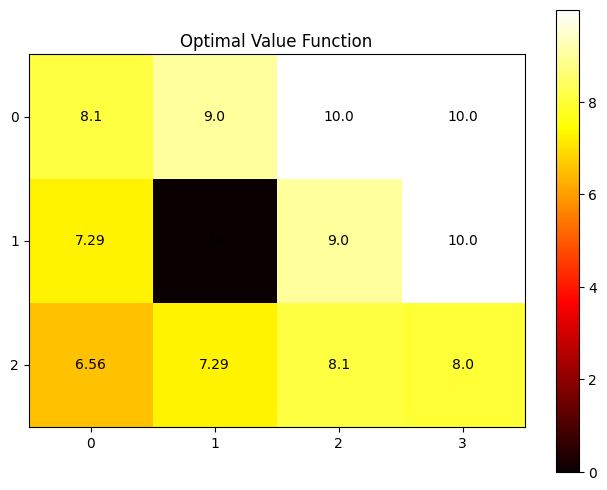

In [19]:
# Visualize the optimal value function using a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(V, cmap='hot', interpolation='nearest')
plt.title('Optimal Value Function')
for i in range(rows):
    for j in range(cols):
        plt.text(j, i, round(V[i, j], 2), ha='center', va='center', color='black')
plt.colorbar()
plt.xticks(range(cols))
plt.yticks(range(rows))
plt.show()

In [13]:
# Extract and print the optimal policy
def extract_policy():
    policy = [['' for _ in range(cols)] for _ in range(rows)]

    for i in range(rows):
        for j in range(cols):
            if not np.isnan(rewards[i][j]):
                max_value = float('-inf')
                best_action = None
                for idx, action in enumerate(actions):
                    new_state, reward = step((i, j), action)
                    new_value = reward + gamma * V[new_state[0]][new_state[1]]
                    if new_value > max_value:
                        max_value = new_value
                        best_action = actions[idx]

                if best_action == (0, 1):
                    policy[i][j] = 'R'
                elif best_action == (0, -1):
                    policy[i][j] = 'L'
                elif best_action == (-1, 0):
                    policy[i][j] = 'U'
                elif best_action == (1, 0):
                    policy[i][j] = 'D'

    return policy

In [14]:
# Print the optimal policy
policy = extract_policy()
print("\nOptimal Policy:")
for row in policy:
    print(row)


Optimal Policy:
['R', 'R', 'R', 'R']
['U', '', 'U', 'U']
['R', 'R', 'U', 'U']


In [22]:
policy = ['R', 'R', 'R', 'R']
['U', '', 'U', 'U']
['R', 'R', 'U', 'U']

# Prepare the data for visualization
actions_count = {'U': 0, 'D': 0, 'L': 0, 'R': 0}
for row in policy:
    for action in row:
        if action:  # Exclude empty actions (if any)
            actions_count[action] += 1

actions = list(actions_count.keys())
counts = list(actions_count.values())



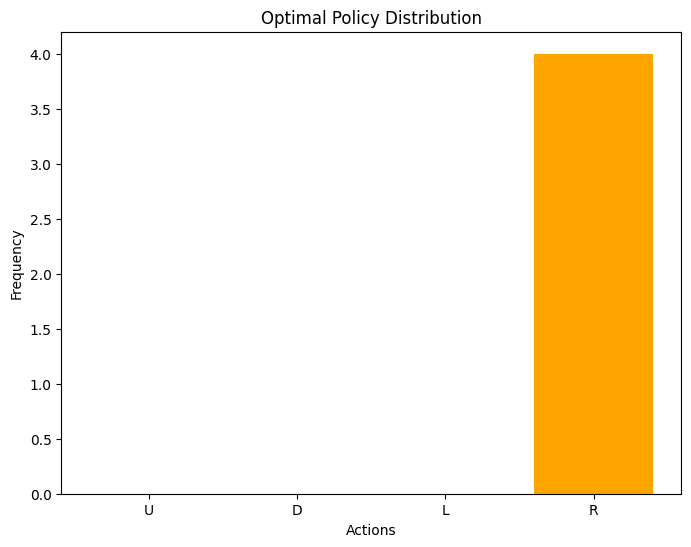

In [23]:
# Visualize the optimal policy using a bar graph
plt.figure(figsize=(8, 6))
plt.bar(actions, counts, color=['blue', 'green', 'red', 'orange'])
plt.title('Optimal Policy Distribution')
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.show()